## I performed EDA, Feature Engineering and Machine Learning Algorithm to predict Fire Weather Index(FWI).

## Feature Information : 

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

#### Weather data observations :
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8

#### FWI Components :
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely not fire and fire.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("../dataset/Algerian_forest_fires_dataset.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
# df.sample(30)

In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Dealing with null values

In [6]:
df[df.isnull().any(axis= 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

#### index 122 : "Sidi-Bel Abbes Region Dataset"
#### index 123 : "Bejaia Region Dataset"

In [8]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
df["Region"] = df["Region"].astype(int)

In [11]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [12]:
df = df.dropna().reset_index(drop=True)

In [13]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [14]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df = df.drop(122).reset_index(drop=True)

### Change trailing space of column

In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


### Change datatype :

In [18]:
df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [20]:
obj_col = df.select_dtypes("O").columns[:-1]

In [21]:
for col in obj_col:
    df[col] = df[col].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df["Classes"] = df["Classes"].str.strip()

In [26]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [27]:
df.to_csv("../dataset/cleaned_Algerian_forest_fires_dataset.csv",index=False)

## Exploratory Data Analysis

### Drop day,month,year column

In [28]:
df_copy = df.copy()

In [29]:
# df_copy.drop(["day","month","year"],axis=1,inplace=True)

In [30]:
df_copy.drop(["year"],axis=1,inplace=True)

In [31]:
df_copy

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [32]:
df_copy["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [33]:
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains("not fire"),0,1)

In [34]:
df_copy

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [35]:
df_copy.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [36]:
df_copy.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [37]:
df_copy["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Outlier Treatment

<Axes: >

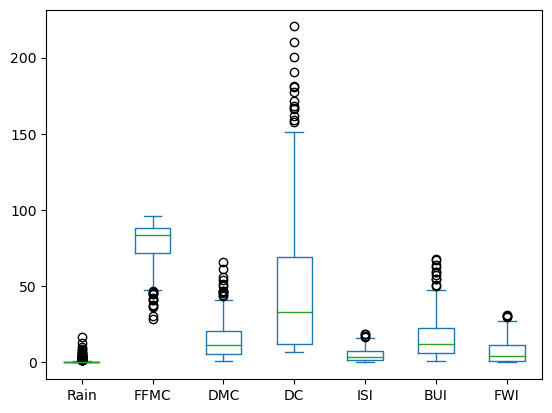

In [38]:
df_copy.select_dtypes([float]).plot(kind="box")

## Summary : 
#### We have outlier in all the above column.
#### We need to impute then with there mean or median value.

In [39]:
df_numeric = df_copy.iloc[:,2:12]

In [40]:
df_numeric.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [41]:
def outlier_treatment(col_name):
    q1,q3 = df_copy[col_name].quantile([0.25,0.75])
    iqr = q3 - q1
    
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # df_copy[col_name].mean()
    # df_copy[col_name].apply(lmabda x : x > lower_whisker & x < upper_whisker )
    df_copy.loc[(df_copy[col_name] < lower_whisker) | (df_copy[col_name] > upper_whisker),col_name] = df_copy[col_name].mean()

In [42]:
list(df_numeric.columns)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [43]:
for col in list(df_numeric.columns): 
    outlier_treatment(col)

### Feature Engineering

In [44]:
df_copy.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29.0,57.0,18.000000,0.000000,65.700000,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29.0,61.0,13.000000,0.762963,64.400000,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26.0,82.0,15.493827,0.762963,77.842387,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25.0,89.0,13.000000,0.762963,77.842387,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27.0,77.0,16.000000,0.000000,64.800000,3.0,14.2,1.2,3.9,0.5,0,0


### Density or Hist plot for all features

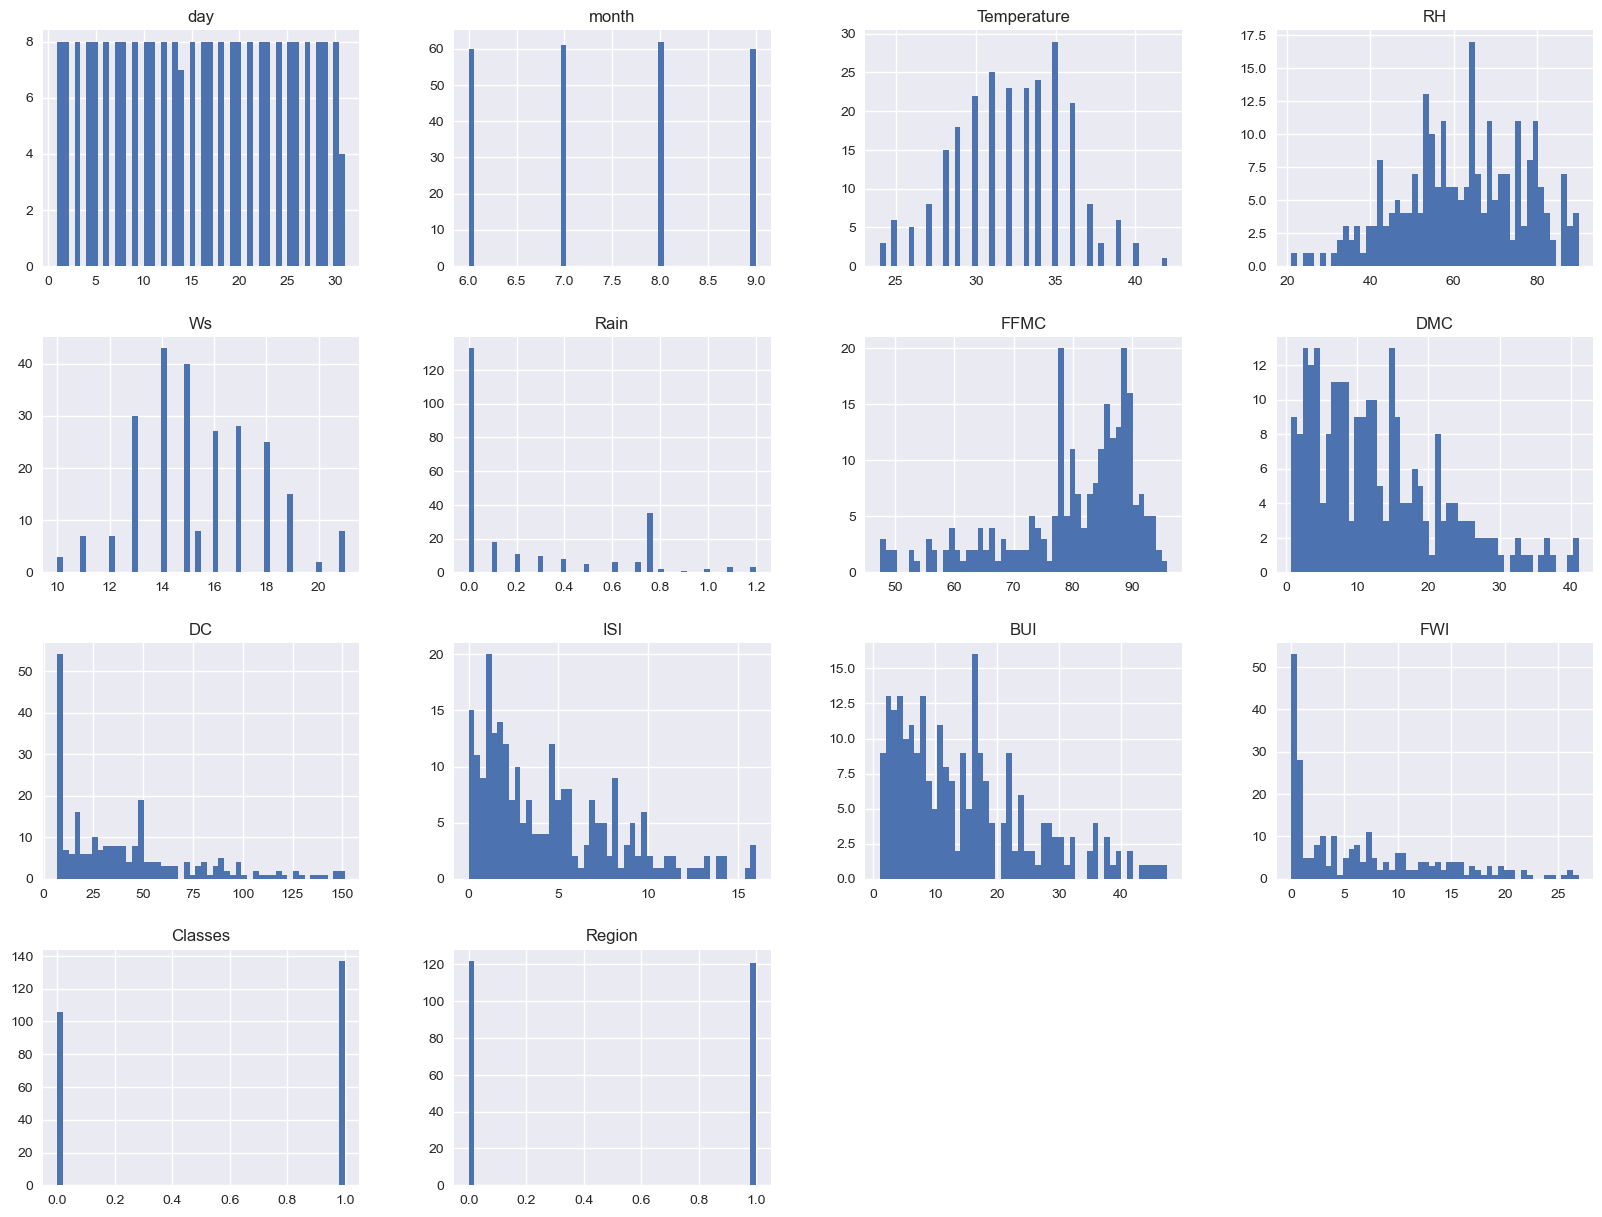

In [45]:
plt.style.use("seaborn-v0_8")
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [46]:
# plt.style.available

In [47]:
label = ["Fire","Not Fire"]
percentage = df_copy["Classes"].value_counts() / len(df_copy) * 100

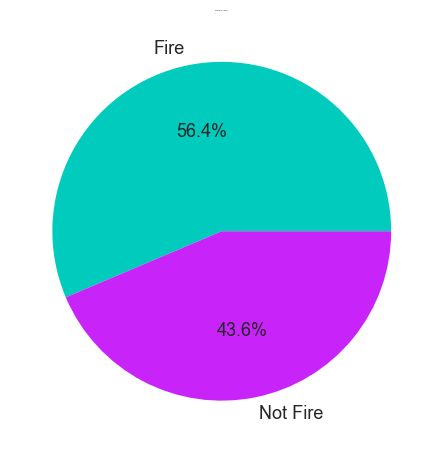

In [48]:
plt.pie(percentage,labels=label,autopct="%0.1f%%",colors=["#01CBBC","#C823F9"],textprops={"fontsize":"13"})
plt.title("Pie Chart of Classes",fontdict={"fontsize":"1"})
plt.show()

### Correlation between all features

In [49]:
df_copy.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.079568,-0.076034,0.069906,-0.150253,0.208656,0.450011,0.443691,0.234467,0.476140,0.323018,0.202840,0.000821
month,-0.000369,1.000000,-0.026589,-0.041252,-0.044316,-0.045428,0.103092,0.029093,0.076557,0.059878,0.032663,0.077618,0.024004,0.001857
Temperature,0.079568,-0.026589,1.000000,-0.643168,-0.218445,-0.271304,0.553767,0.556596,0.398701,0.577172,0.495298,0.580581,0.506583,0.255032
RH,-0.076034,-0.041252,-0.643168,1.000000,0.156867,0.208970,-0.553883,-0.449762,-0.264570,-0.644501,-0.383952,-0.545957,-0.432161,-0.402682
Ws,0.069906,-0.044316,-0.218445,0.156867,1.000000,0.050334,-0.108015,-0.003067,0.084339,0.046451,0.059490,0.055295,-0.020388,-0.148395
Rain,-0.150253,-0.045428,-0.271304,0.208970,0.050334,1.000000,-0.700140,-0.456007,-0.484983,-0.586361,-0.469837,-0.557444,-0.647449,-0.019229
FFMC,0.208656,0.103092,0.553767,-0.553883,-0.108015,-0.700140,1.000000,0.624712,0.530125,0.758609,0.605139,0.724946,0.784883,0.186554
DMC,0.450011,0.029093,0.556596,-0.449762,-0.003067,-0.456007,0.624712,1.000000,0.760393,0.653550,0.929398,0.767463,0.624888,0.215253
DC,0.443691,0.076557,0.398701,-0.264570,0.084339,-0.484983,0.530125,0.760393,1.000000,0.547265,0.854218,0.683820,0.567899,-0.058555
ISI,0.234467,0.059878,0.577172,-0.644501,0.046451,-0.586361,0.758609,0.653550,0.547265,1.000000,0.635354,0.891249,0.755701,0.231297


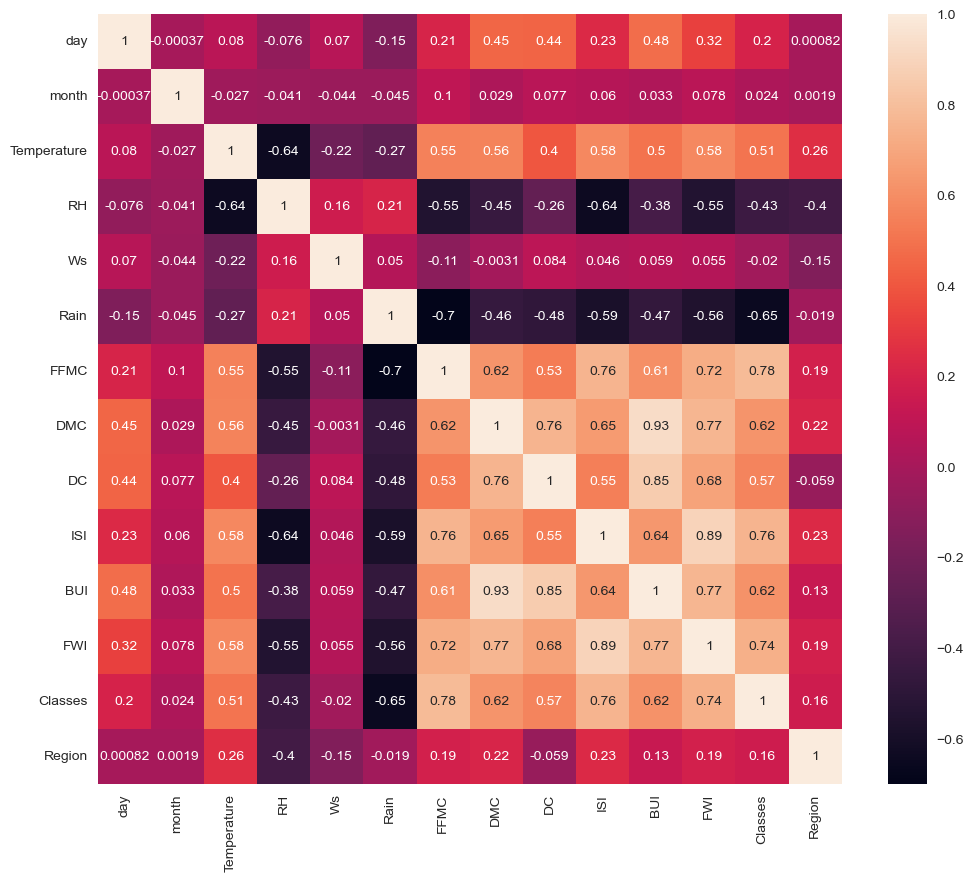

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

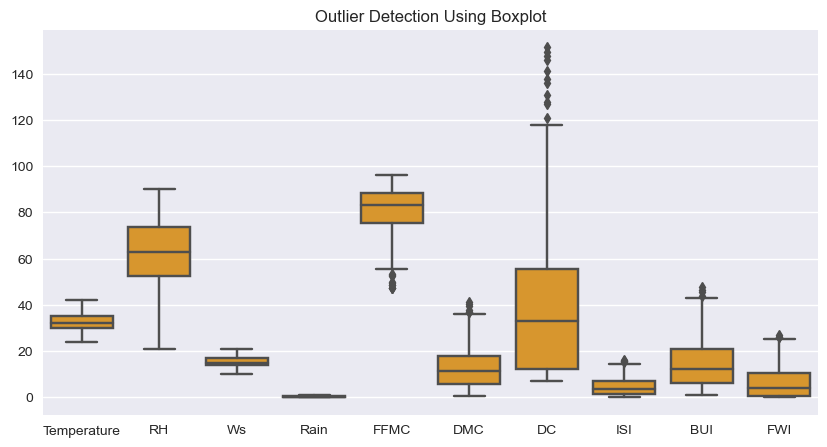

In [51]:
# for i in df_copy.select_dtypes([float]):
plt.figure(figsize=(10,5))
sns.boxplot(df_copy.select_dtypes([float]),color="#F39C12")
plt.title("Outlier Detection Using Boxplot")
plt.show()

In [52]:
### Th

## Monthly Fire Analysis

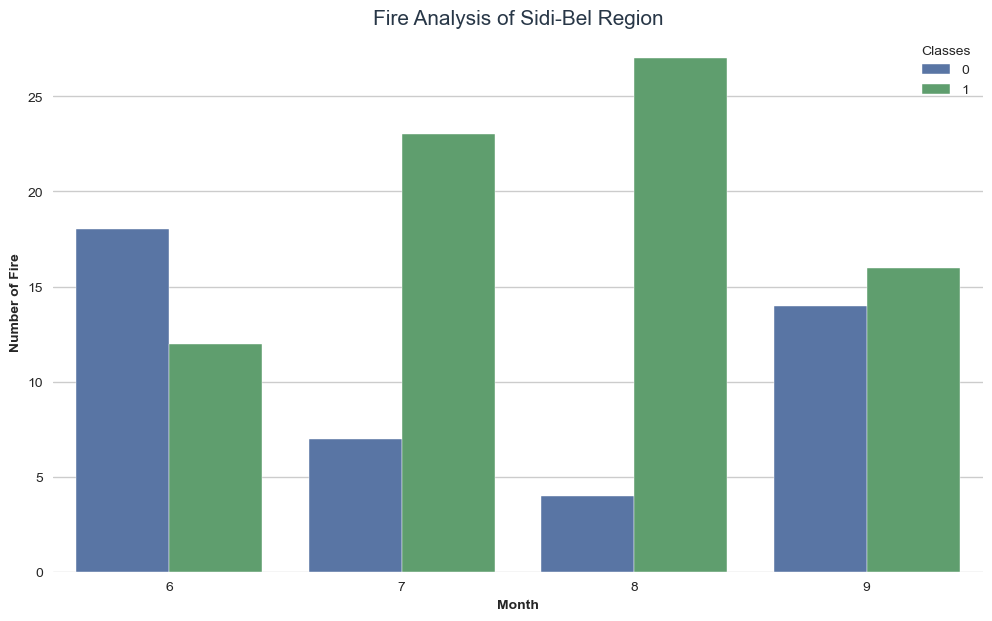

In [53]:
temp_df = df_copy[df_copy["Region"] == 1]
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=temp_df)
plt.title("Fire Analysis of Sidi-Bel Region",fontdict={"fontsize":15,"color":"#283747"})
plt.xlabel("Month",weight="bold")
plt.ylabel("Number of Fire",weight="bold")
plt.show()

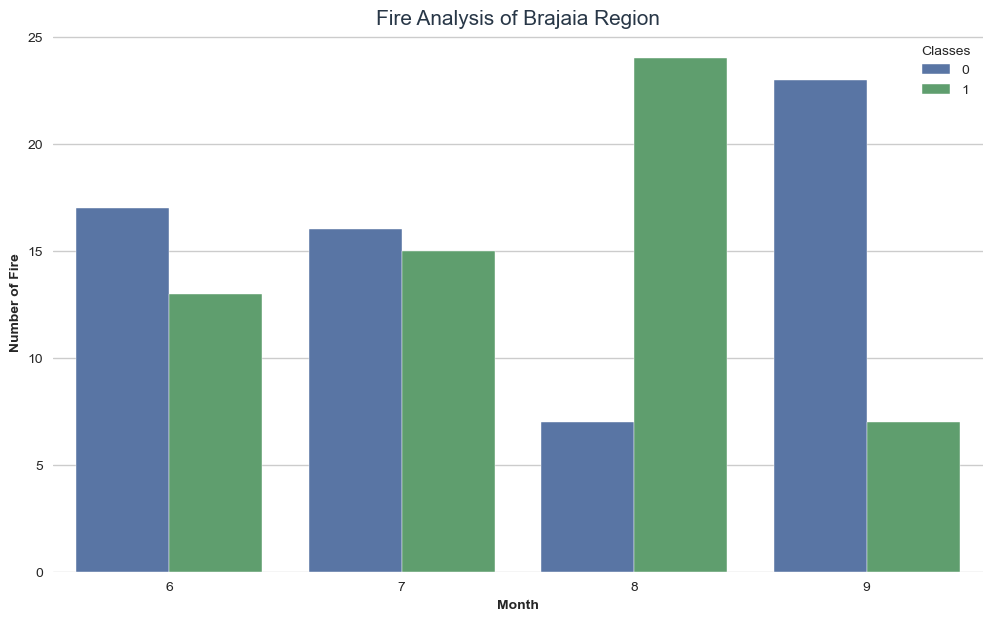

In [54]:
temp_df = df_copy[df_copy["Region"] == 0]
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=temp_df)
plt.title("Fire Analysis of Brajaia Region",fontdict={"fontsize":15,"color":"#283747"})
plt.xlabel("Month",weight="bold")
plt.ylabel("Number of Fire",weight="bold")
plt.show()

### Objervations :
#### Sidi-Bel Region had more than 25 times fire in 8th month.
#### Brajaia Region had almost 24 times fire in 8th month and in 9th month there was less number of fire as compare to not fire almost 23 times.
#### In the 7th month number of fire and not fire was almost equal in Brajaia Region.
#### In the 9th month number of fire and not fire was almost equal in Sidi-Bel Region.

In [102]:
df_copy.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29.0,57.0,18.000000,0.000000,65.700000,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29.0,61.0,13.000000,0.762963,64.400000,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26.0,82.0,15.493827,0.762963,77.842387,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25.0,89.0,13.000000,0.762963,77.842387,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27.0,77.0,16.000000,0.000000,64.800000,3.0,14.2,1.2,3.9,0.5,0,0


#### We don't need day month for training machine leraning model.
#### Dropping day and month column

In [56]:
X = df_copy.drop(["day","month","FWI"],axis=1)
y = df_copy["FWI"]

In [57]:
# Train test split the data
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [60]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.655976,-0.211904,-0.336101,0.561213,0.560121,0.402199,0.602530,0.486738,0.536696,0.244739
RH,-0.655976,1.000000,0.145493,0.250839,-0.587275,-0.458069,-0.266988,-0.663706,-0.376708,-0.456876,-0.394665
Ws,-0.211904,0.145493,1.000000,0.070757,-0.106653,0.003349,0.088188,0.021146,0.064441,-0.002238,-0.139097
Rain,-0.336101,0.250839,0.070757,1.000000,-0.716424,-0.471935,-0.481908,-0.581783,-0.473820,-0.645015,-0.073179
FFMC,0.561213,-0.587275,-0.106653,-0.716424,1.000000,0.645724,0.540325,0.763397,0.615621,0.789171,0.226421
DMC,0.560121,-0.458069,0.003349,-0.471935,0.645724,1.000000,0.770370,0.656150,0.941796,0.661027,0.241107
DC,0.402199,-0.266988,0.088188,-0.481908,0.540325,0.770370,1.000000,0.552525,0.840259,0.585592,-0.023823
ISI,0.602530,-0.663706,0.021146,-0.581783,0.763397,0.656150,0.552525,1.000000,0.635061,0.765555,0.256951
BUI,0.486738,-0.376708,0.064441,-0.473820,0.615621,0.941796,0.840259,0.635061,1.000000,0.641337,0.152849
Classes,0.536696,-0.456876,-0.002238,-0.645015,0.789171,0.661027,0.585592,0.765555,0.641337,1.000000,0.188837


<Axes: >

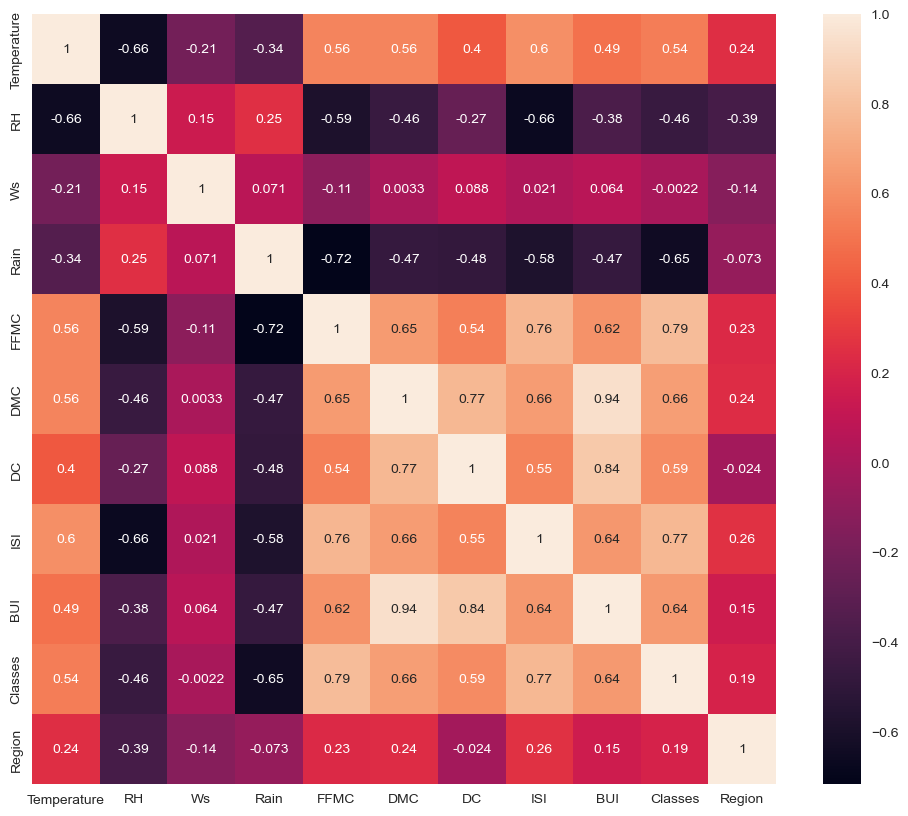

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [62]:
def find_corr(data,threshold):
    corr_matrix = data.corr()
    corr_col = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                corr_col.add(corr_matrix.columns[i])
    return corr_col

In [63]:
# Threshold-Domain Expertise
corr_features = find_corr(X_train,0.85)
corr_features

{'BUI'}

In [64]:
# Drop feature which has more than 0.85 correlation:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [97]:
# Feature Scaling / Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

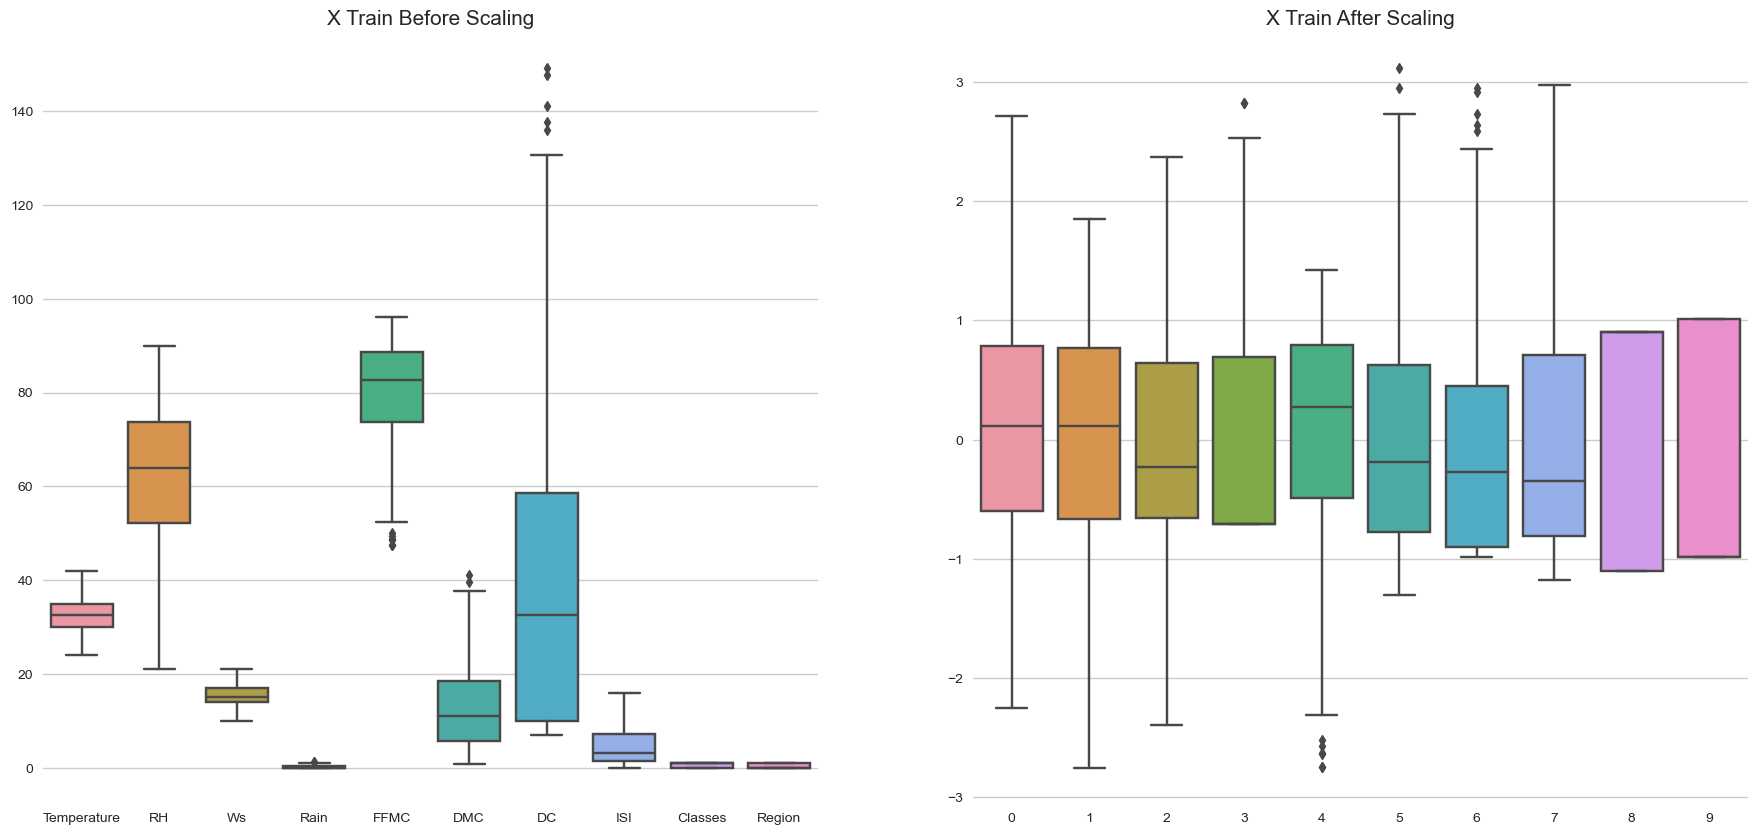

In [98]:
# plt.figure()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,10))

sns.boxplot(X_train,ax=ax1)
ax1.set_title("X Train Before Scaling",fontdict={"fontsize":15})
sns.boxplot(X_train_scaled,ax=ax2)
ax2.set_title("X Train After Scaling",fontdict={"fontsize":15})

# plt.tight_layout()
plt.show()

### Lasso Regression Model

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

Mean Square Error : 4.2303879265809545
R2 Score : 0.8790200651595177


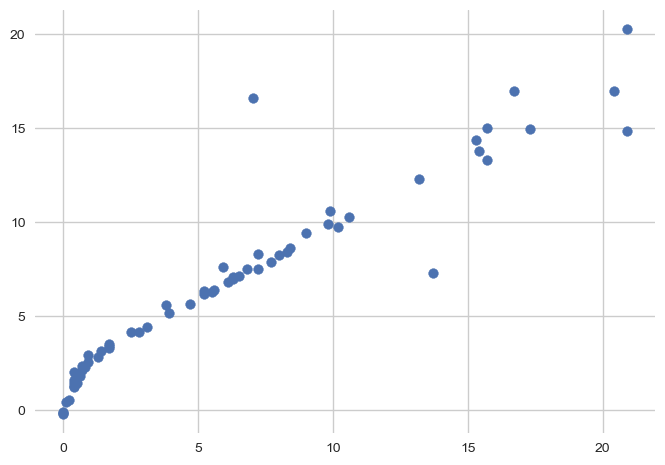

In [70]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Square Error :",mse)
print("R2 Score :",score)

plt.scatter(y_test,y_pred)
plt.show()

### Lasso Cross Validation

In [71]:
from sklearn.linear_model import LassoCV

Mean Absolute Error : 1.1597007747123393
R2 Score : 0.894193606762872
[ 0.10788934 -0.          0.         -0.          0.          1.086306
  1.05222408  4.55882963  0.17265048  0.        ]


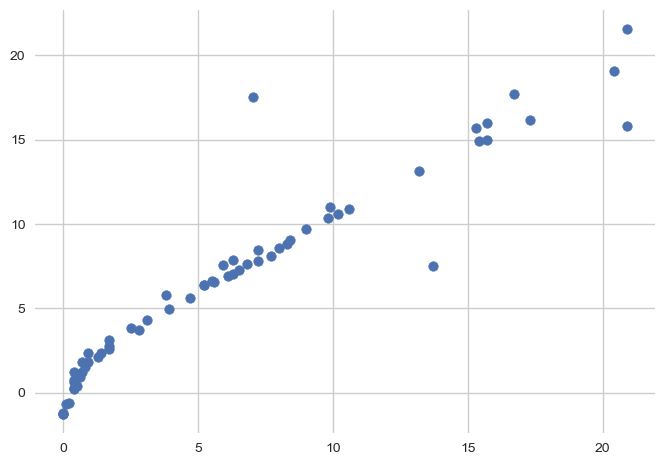

In [108]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error :",mae)
print("R2 Score :",score)
print(lassocv.coef_)

plt.scatter(y_test,y_pred)
plt.show()

### Creating Pickle File

In [91]:
scaler

StandardScaler()

In [92]:
ridge

Ridge()

In [112]:
import pickle
pickle.dump(scaler,open("../models/scaler.pkl","wb"))
pickle.dump(lassocv,open("../models/lassocv.pkl","wb"))

In [113]:
scaler = pickle.load(open("../models/scaler.pkl","rb"))
scaled_data = scaler.transform([[11,80,20,0.3,66.7,5.5,4.3,0,1,1]])

get_model = pickle.load(open("../models/lassocv.pkl","rb"))
get_model.predict(scaled_data)

array([-1.0485108])